### [Segmentation] Customer Lifetime Value Prediction

CLV merupakan score yang mendeskripsikan value customer bagi revenue perusahaan. <br>
Tinggi rendahnya score pada tiap customer diperoleh berdasarkan seberapa lama/sering customer menjalin hubungan dengan perusahaan, serta seberapa besar nilai masukan ataupun cost yang dihasilkan oleh customer bagi perusahaan.<br>
Mengetahui CLV score dapat membantu perusahaan dalam budgeting & financial planning, penerapan business & marketing strategy pada tiap jenis customer ataupun secara personalized nantinya.<br>
Oleh karena itu, **perusahaan memerlukan sistem yang bisa melakukan prediksi CLV score dengan minimum error sekecil mungkin agar perusahaan bisa mendapatkan gambaran (expected future) yang bisa dimanfaatkan untuk mengetahui potentially profitable customer, produk yang sedang diminati customer serta strategi yang tepat untuk meningkatkan retensi customer terhadap perusahaan.**


**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Type of vehicle class |
| Coverage | Object | Type of vehicle insurance |
| Renew Offer Type | Object | Type of insurance renewal offer |
| EmployementStatus | Object | Current status of customer in professional term |
| MaritalStatus | Object | Current status of customer in relationship term |
| Education | Object | Education |
| Number of Policies | Float | Number of insurance policies that customer holds |
| Monthly Premium Auto | Float | Amount the policyholder pays monthly for their auto insurance* coverage |
| Total Claim Amount | Float | Total amount of money the insurance company has paid out in claims. |
| Income | Float | Annual income of customer |
| Customer Lifetime Value | Float | Metric that estimates the total revenue a company can expect from a customer |

*Auto Insurance Policy is an insurance that covers damages or losses to the policyholder's vehicle <br>

**Regression Metrics** <br>
1. MedAE: Nilai *rata error dari hasil prediksi dalam skala unit.
2. MedAPE**: Nilai *rata error dari hasil prediksi dalam skala persen. 
3. R2 Score: Mengukur kemampuan dalam mengenali varians data terhadap target 
4. RMSE: Identifikasi besaran outlier pada error dalam skala unit. *(additional)*
5. MAPE: Identifikasi besaran outlier pada error dalam skala persen. *(additional)*
**menggunakan formula: abs(y_pred - y_true)/y_true

**Classifier Metrics**
1. Accuracy: mengukur keakuratan model prediksi 
2. F1 Score: mengukur keseimbangan antara presisi dan recall.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'C:\Clarenti\Data\Project\Py\Analytics\DS/3/dataset_kelompok/data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [4]:
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [5]:
df.duplicated().sum()

618

In [3]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


In [8]:
f"80% data merupakan customer dengan score < {np.percentile(df['Customer Lifetime Value'], 80)}"

'80% data merupakan customer dengan score < 10314.52484'

Anomali & Consistency Data

In [106]:
df[ (df.Income == 0) & (df.EmploymentStatus != 'Unemployed') ]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value


In [107]:
len(df[ (df.Income > 0) & (df.EmploymentStatus == 'Unemployed') ])

0

In [108]:
df[(df.Income == 0)]['EmploymentStatus'].unique()

array(['Unemployed'], dtype=object)

*Insight: Customer dengan status `Unemployed` memiliki income 0*

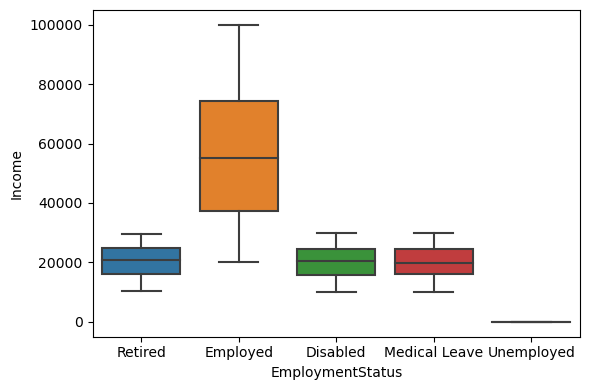

In [110]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['EmploymentStatus'], y=df['Income'])
plt.tight_layout();

In [111]:
df.groupby(['EmploymentStatus'])['Income'].mean()

EmploymentStatus
Disabled         20073.138889
Employed         56449.113273
Medical Leave    20145.767241
Retired          20368.857143
Unemployed           0.000000
Name: Income, dtype: float64

**Correlation Between CLV Score and Numerical Variables**

<Axes: >

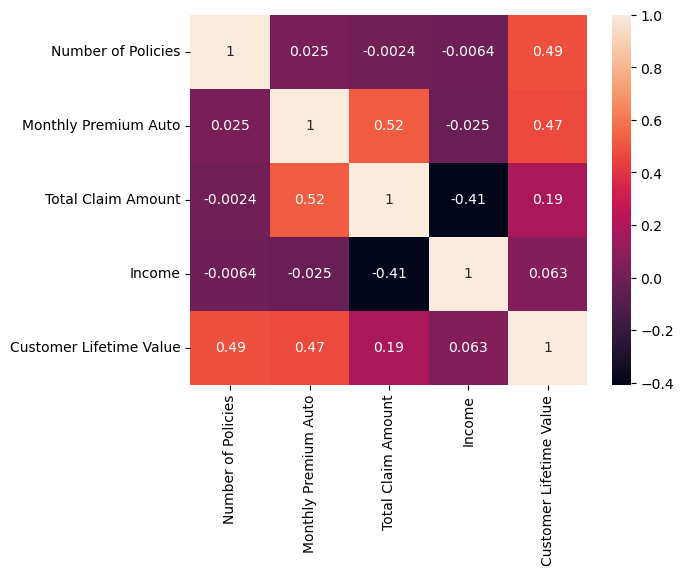

In [35]:
sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True)

- CLV memiliki moderate korelasi (47%) pada monthly premium. <br> 
Business Context: <u>Semakin besar biaya perbulan yang dibayar customer, maka semakin besar score customer</u>
- Korelasi searah antara CLV dan Total Claim, indikasi semakin besar total claim amount semakin besar nilai clv, namun korelasi ini termasuk korelasi lemah dengan strength 19%. <br>
Business Context: <u>Beberapa data menjelaskan bahwa besaran jumlah claim yang dibayar perusahaan berbanding lurus dengan nilai customer tsb</u>
- Income dan Total Claim Amount memiliki moderate / korelasi sedang yang berlawan (41%). <br>
Business Context: <u>Besaran nilai pada jumlah claim yang dibayar perusahaan berbanding terbalik dengan besaran nilai pada penghasilan customer</u>
- Total Claim Amount and Monthly Premium Auto memiliki relasi positif cukup kuat (52%). <br>
Business Context: <u>Semakin besar biaya perbulan yang dibayar customer, semakin besar total claim yang diberikan perusahaan.</u>
<br><br>
**Pre-conclusion 1 : Korelasi atas menunjukkan bahwa kecenderungan semakin rendah income customer perusahaan, ialah customer yang lebih willing dalam spending money pada asuransi kendaraan mereka.**

Text(0.5, 1.0, 'Outlier Threshold Detection')

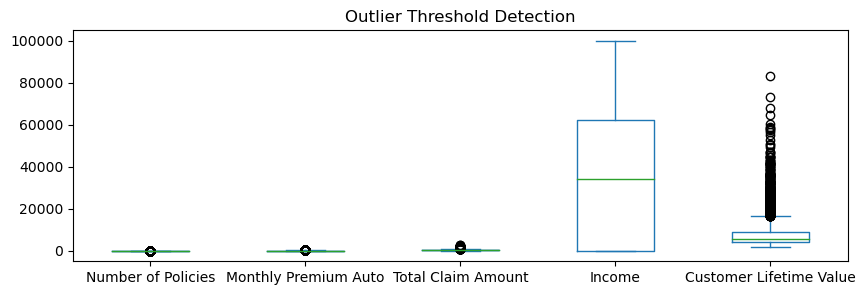

In [ ]:
df.plot(kind='box', figsize=(10,3))
plt.title('Outlier Threshold Detection')

Outlier dihiraukan dikarenakan informasi terkait high value/score customer berada pada rentang tersebut.

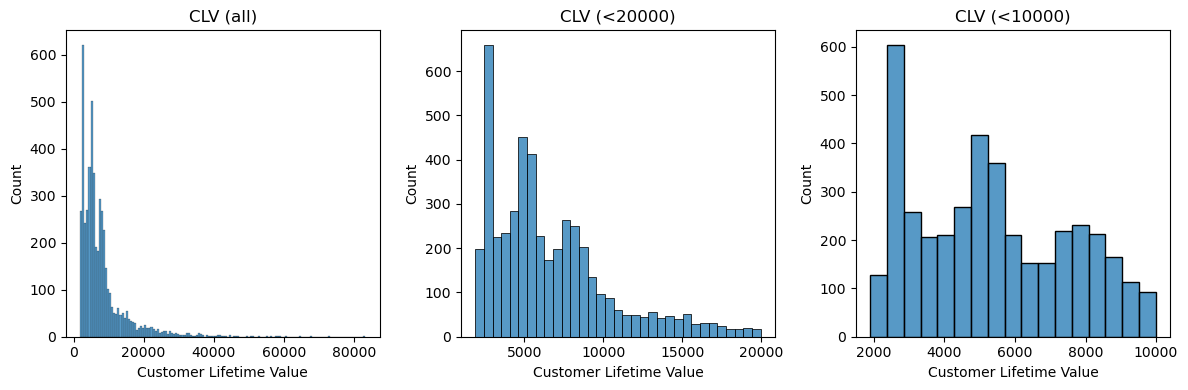

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))
sns.histplot(ax=ax[0], data=df['Customer Lifetime Value'])
ax[0].set_title('CLV (all)')
sns.histplot(ax=ax[1], data=df[(df['Customer Lifetime Value']) < 20000]['Customer Lifetime Value'])
ax[1].set_title('CLV (<20000)')
sns.histplot(ax=ax[2], data=df[(df['Customer Lifetime Value']) <= 10000]['Customer Lifetime Value'])
ax[2].set_title('CLV (<10000)')
plt.tight_layout()

**Analisis pendekatan model terhadap data:**
- Jumlah data semakin menurun seiring meningkatnya score clv, *potensi adanya indikasi kesulitan dalam memprediksi score customer*

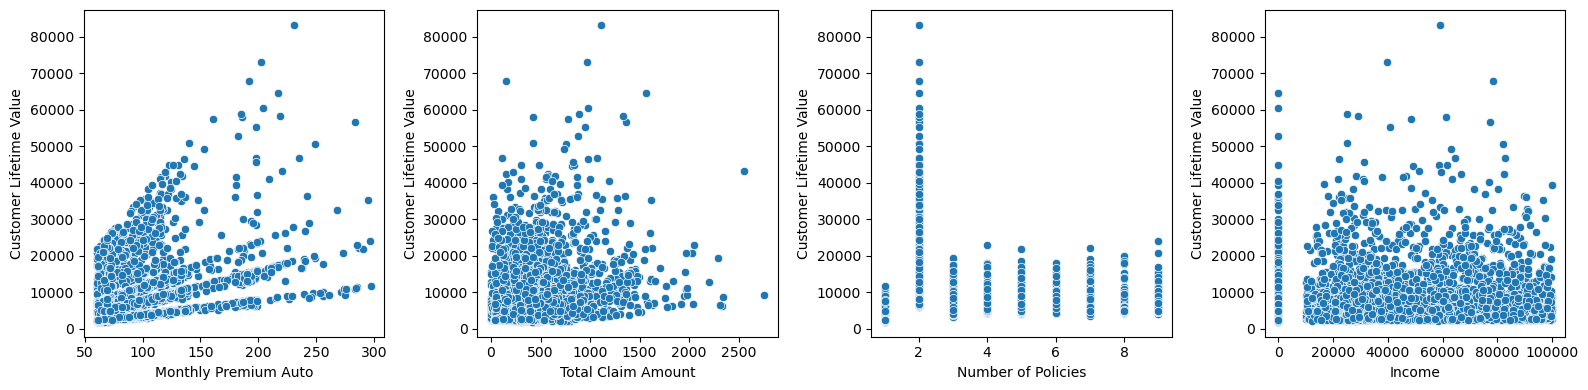

In [84]:
fig, ax = plt.subplots(1,4, figsize=(16,4))
sns.scatterplot(ax=ax[0], data = df, y='Customer Lifetime Value', x='Monthly Premium Auto')
sns.scatterplot(ax=ax[1], data = df, y='Customer Lifetime Value', x='Total Claim Amount')
sns.scatterplot(ax=ax[2], data = df, y='Customer Lifetime Value', x='Number of Policies')
sns.scatterplot(ax=ax[3], data = df, y='Customer Lifetime Value', x='Income')
plt.tight_layout();

- Kebanyakan data berkelompok pada rentang < 20000, maka kemungkinan potensi kesulitan model dalam memprediksi ada pada customer yang memiliki characteristic dan score > 20000.
- Jika dilihat pada scatter, CLV & Monthly Premium memiliki indikasi hubungan linear, indikasi setiap kenaikan value pada "Monthly Premium" maka kenaikan juga pada CLV Score. *(lit. semakin besar besaran biaya perbulan yang dibayar maka semakin besar score customer tersebut)*
- High Value Customer (> 20000) memegang max 2 policies.

**Correlation Between CLV Score and Categorical Variables** 

In [43]:
lists = []
for i in df.select_dtypes('object').columns:
    lists.append([i, df[i].nunique(), df[i].unique()])

pd.DataFrame(lists, columns=['column', 'nunique', 'unique'])

,column,nunique,unique
0,Vehicle Class,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,3,"[Divorced, Married, Single]"
5,Education,5,"[High School or Below, College, Master, Bachelor, Doctor]"


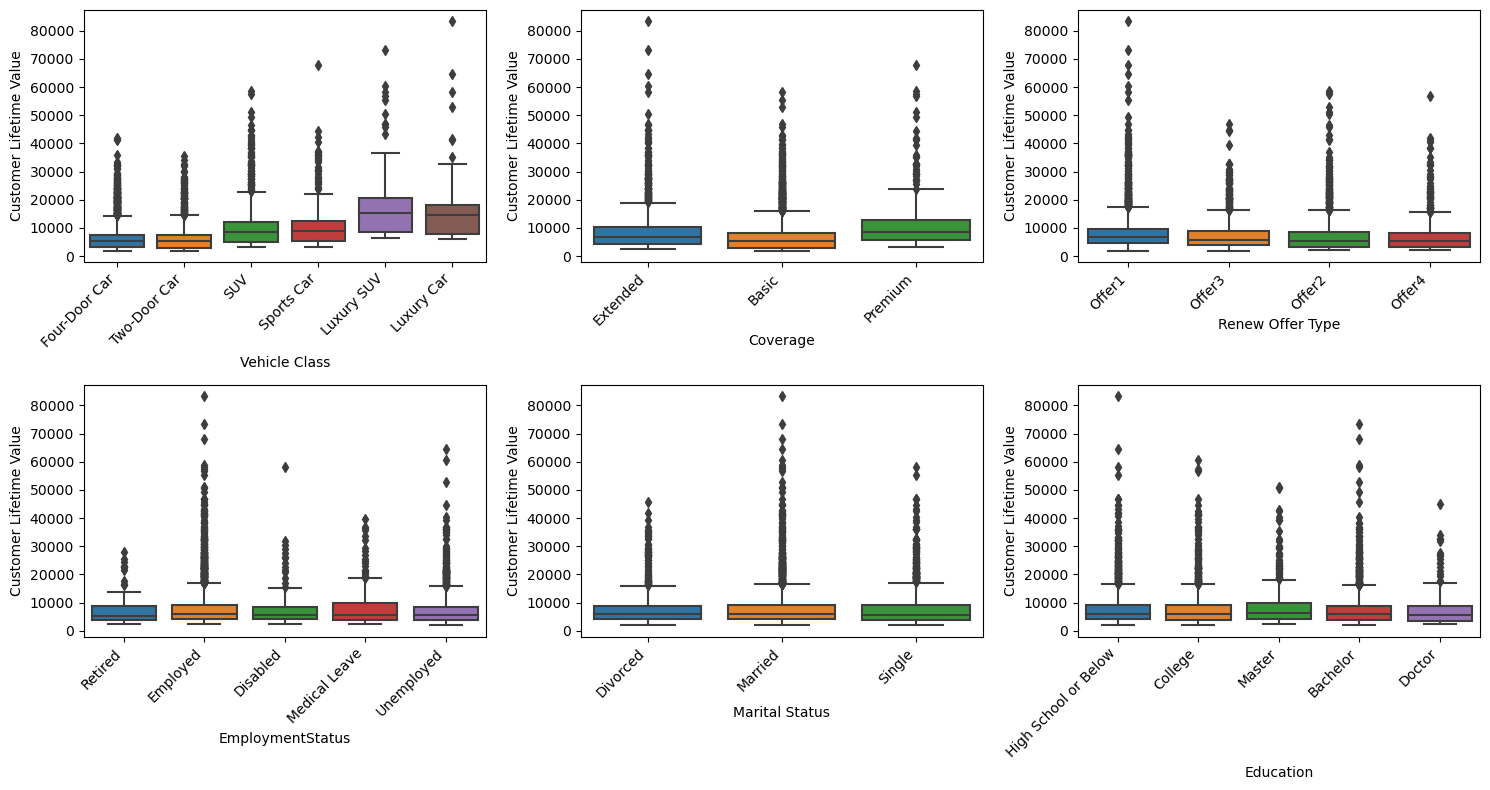

In [85]:
max_column = 3
max_row = 2
j,k = 0,0

fig, ax = plt.subplots(max_row,max_column, figsize=(15, 8))
for i in df.select_dtypes('object').columns:
    if k == max_column:
        j += 1
        k=0
        
    axes = sns.boxplot(ax=ax[j, k],data = df, x=i, y='Customer Lifetime Value')
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
    k += 1

plt.tight_layout();

Correlated Features towards CLV: 
- Vehicle Class: Semakin tinggi level kendaraan yang dibeli, semakin tinggi score customer tersebut.
- Marital Status : Sebagian besar customer yang memiliki potensi value diatas 40000, ialah customer yang berstatus married.
- Employment Status : Customer dengan clv score tinggi kebanyakan employed customer. (Kecenderungan customer yang masih berstatus bekerja memiliki potensi dalam kenaikan score).
- Coverage: Extended coverage memiliki high value customer lebih tinggi dibanding jenis coverage lainnya.
- Renew Offer Type: Customer dengan CLV Score tinggi lebih banyak memilih tipe renewal offer 1.
- Education, berdasarkan penyebaran data pada data non-outlier, ke-5 status pendidikan tersebut tidak menunjukkan fluktuasi significant terhadap score clv yang menandakan tidak ada perbedaan/korelasi unik antara education dan clv, meskipun pada penyebaran data outlier diketahui data dengan high value customer cenderung berada pada customer status High School, namun secara realita semakin tinggi level pendidikan, jumlah manusia yang mencapai level tersebut semakin sedikit. <br>
Oleh karena itu fitur `Education` *belum bisa dijadikan patokan/dasar nilai clv*.

**Feature Selection**

In [4]:
selected_features = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income',
       'Customer Lifetime Value']

In [5]:
df = df[selected_features]

**Feature Engineer**

In [6]:
categorical_features = ['EmploymentStatus', 'Marital Status', 'Renew Offer Type']
ordinal_features = ['Vehicle Class', 'Coverage']

categorical_tf = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')),
    ]
)

# Define order
vehicle_class_order = ['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury SUV', 'Sports Car', 'Luxury Car']
coverage_order = ['Basic', 'Extended', 'Premium']
# education_order = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']
ordinal_tf = Pipeline(
    steps=[
        ('ordinal', OrdinalEncoder(categories=[vehicle_class_order, coverage_order]))
    ]
)

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_tf, categorical_features),
    ('ordinal', ordinal_tf, ordinal_features)
], remainder='passthrough')

In [7]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['EmploymentStatus', 'Marital Status',
                                  'Renew Offer Type']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(categories=[['Four-Door '
                                                                              'Car',
                                                                              'Two-Door '
                                                                              'Car',
                                                                              'SUV',
                                                                              'Luxury '
                                                                              'SUV',
                                                                              'Sports '
                                                                              'Car',
                                                                              'Luxury '
                                                                              'Car'],
                                                                             ['Basic',
                                                                              'Extended',
                                                                              'Premium']]))]),
                                 ['Vehicle Class', 'Coverage'])])

In [8]:
df_category = preprocessor.fit_transform(df)
feature_names = preprocessor.get_feature_names_out()
feature_names = [name.split('__')[1] if '__' in name else name for name in feature_names]

encoded_df = pd.DataFrame(df_category, columns=feature_names)

In [9]:
encoded_df.head(2)

,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital Status_Married,Marital Status_Single,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Vehicle Class,Coverage,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,90.0,571.479602,11828.0,10083.486880
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,62.0,114.514440,44762.0,4943.386117


**Model yang akan diuji:**
- Random Forest: Ensemble method dimana cara kerja membentuk beberapa decision tree dan mengkombinasikan hasil prediksi dari rata masing-masing decision tree tersebut, less sensitive terhadap outlier. 
- Gradient Boosting Machines: sequential training pada cara kerja model memungkinkan model dalam meminimalisir error.

In [10]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_absolute_percentage_error, make_scorer

In [11]:
models = ['RandomForestRegressor', 'GradientBoostingRegressor']

**Data Selection**

In [36]:
from sklearn.model_selection import KFold, cross_val_score

In [13]:
rf = RandomForestRegressor()
gbm = GradientBoostingRegressor()

In [14]:
X = encoded_df.drop(columns=['Customer Lifetime Value'], axis=1)
y = encoded_df['Customer Lifetime Value']

In [ ]:
kf = KFold(n_splits=7, shuffle=True, random_state=42)

In [16]:
rf_scores = cross_val_score(rf, X, y, scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False), cv=kf)
gbm_scores = cross_val_score(gbm, X, y, scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False), cv=kf)

In [17]:
print(f'Random Forest CrossVal: {rf_scores}')
print(f'Gradient Boosting Machine CrossVal: {gbm_scores}')

Random Forest CrossVal: [-0.12908403 -0.13157592 -0.13617698 -0.12101419 -0.12098191 -0.12171956
 -0.11226618]
Gradient Boosting Machine CrossVal: [-0.13907306 -0.15176418 -0.15709573 -0.13912952 -0.14523973 -0.14417769
 -0.13640742]


Percobaan crossval dari kedua model mendapati model `Random Forest` mampu menghasilkan rata percentase error lebih rendah dibandingkan gradient boosting, maka analisis dan evaluasi selanjutnya akan berfokus pada model tersebut.

In [18]:
def best_feature_index(th_fold, kf, X):
    for fold, (train_index, val_index) in enumerate(kf.split(X)):
        if fold == th_fold:
            X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
            y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
        
            return X_train_fold, X_val_fold, y_train_fold, y_val_fold

In [19]:
rf_X_train_fold, rf_X_val_fold, rf_y_train_fold, rf_y_val_fold = best_feature_index(rf_scores.argmax(), kf, X)
# gbm_X_train_fold, gbm_X_val_fold, gbm_y_train_fold, gbm_y_val_fold = best_feature_index(gbm_scores.argmax(), kf, X)

**Data Splitting**

RandomForest merupakan tree-based model yang melakukan pembagian data berdasarkan range nilai fitur tertentu, sehingga scaling fitur tidak berpengaruh.

In [20]:
rf.fit(rf_X_train_fold, rf_y_train_fold)

RandomForestRegressor()

**Train Evaluation**

In [21]:
ytrain_pred = rf.predict(rf_X_train_fold)

In [22]:
error_summaries = {}

for i in models:
    error_summary = pd.DataFrame
    if i == 'RandomForestRegressor':
        error_summary = pd.concat([pd.DataFrame(rf_y_train_fold.reset_index(drop=True)), pd.DataFrame(ytrain_pred, columns=['pred'])], axis=1)
   
        error_summary.rename(columns={'Customer Lifetime Value':'train_clv'}, inplace=True)
        error_summary['error'] = np.abs(error_summary['train_clv'] - error_summary['pred'])
        error_summary['error_percentage'] = round(error_summary['error']*100/error_summary['train_clv'],2)
        error_summaries[i] = error_summary

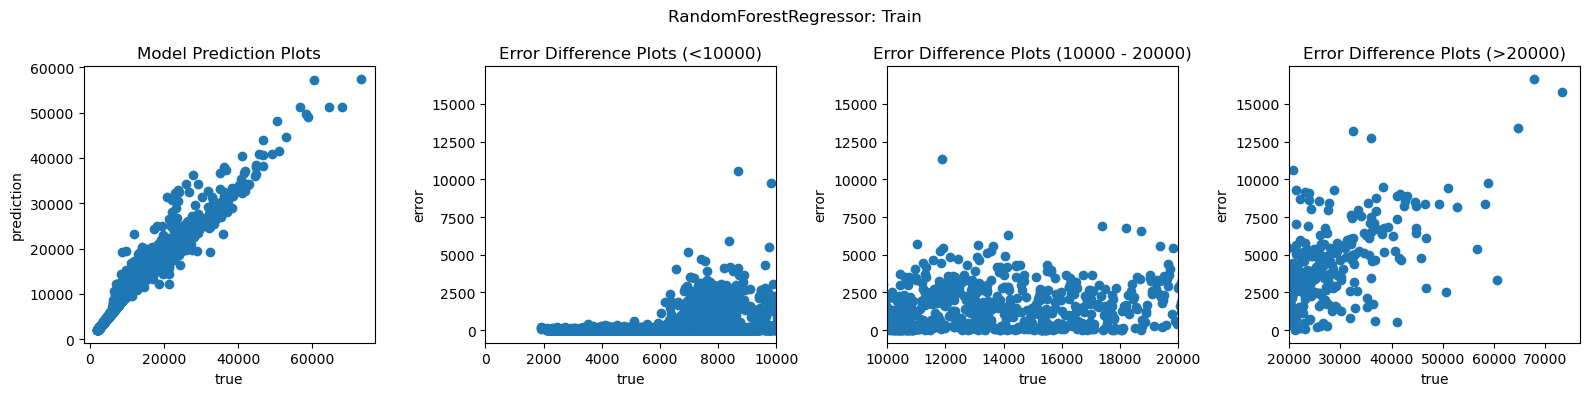

In [186]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.scatter(x=error_summaries['RandomForestRegressor']['train_clv'], y=error_summaries['RandomForestRegressor']['pred'])
plt.title('Model Prediction Plots')
plt.xlabel('true')
plt.ylabel('prediction')

plt.subplot(1, 4, 2)
plt.scatter(x=error_summaries['RandomForestRegressor']['train_clv'], y=error_summaries['RandomForestRegressor']['error'])
plt.title('Error Difference Plots (<10000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(0, 10000)

plt.subplot(1, 4, 3)
plt.scatter(x=error_summaries['RandomForestRegressor']['train_clv'], y=error_summaries['RandomForestRegressor']['error'])
plt.title('Error Difference Plots (10000 - 20000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(10000, 20000)

plt.subplot(1, 4, 4)
plt.scatter(x=error_summaries['RandomForestRegressor']['train_clv'], y=error_summaries['RandomForestRegressor']['error'])
plt.title('Error Difference Plots (>20000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(20000)

plt.suptitle('RandomForestRegressor: Train')
plt.tight_layout()

In [23]:
error_results = {}
r2_score, medae, mape, rmse = 0,0,0,0
for i in models:
    if i == 'RandomForestRegressor':
        r2_score = rf.score(rf_X_train_fold, rf_y_train_fold)
        medae = median_absolute_error(rf_y_train_fold, ytrain_pred)
        rmse = mean_squared_error(rf_y_train_fold, ytrain_pred, squared=False)
        mape = mean_absolute_percentage_error(rf_y_train_fold, ytrain_pred)
   
        error_results[i] = {}
        error_results[i]['R2_Score'] = r2_score
        error_results[i]['MedAE'] = medae
        error_results[i]['MedAPE'] = np.median(error_summaries['RandomForestRegressor']['error_percentage'])
        error_results[i]['RMSE'] = rmse
        error_results[i]['MAPE'] = mape*100

In [24]:
train_result = pd.DataFrame(error_results)
train_result

,RandomForestRegressor
MAPE,4.768513
MedAE,38.280043
MedAPE,0.740000
R2_Score,0.944996
RMSE,1612.792883


Kemampuan model dalam memprediksi kembali clv pada data train bisa digolongkan baik seperti yang ditunjukkan pada table diatas.

In [ ]:
train_df = pd.concat([rf_X_train_fold, rf_y_train_fold], axis=1).reset_index()
train_df = pd.concat([train_df, error_summaries['RandomForestRegressor'][['pred', 'error',  'error_percentage']]], axis=1)

**Test Evaluation**

In [25]:
y_pred = rf.predict(rf_X_val_fold)

In [26]:
error_summaries = {}

for i in models:
    error_summary = pd.DataFrame
    if i == 'RandomForestRegressor':
        error_summary = pd.concat([pd.DataFrame(rf_y_val_fold.reset_index(drop=True)), pd.DataFrame(y_pred, columns=['pred'])], axis=1)
   
        error_summary.rename(columns={'Customer Lifetime Value':'test_clv'}, inplace=True)
        error_summary['error'] = np.abs(error_summary['test_clv'] - error_summary['pred'])
        error_summary['error_percentage'] = round(error_summary['error']*100/error_summary['test_clv'],2)
        error_summaries[i] = error_summary

In [27]:
error_results = {}
r2_score, medae, mape, rmse = 0,0,0,0
for i in models:
    if i == 'RandomForestRegressor':
        r2_score = rf.score(rf_X_val_fold, rf_y_val_fold)
        medae = median_absolute_error(rf_y_val_fold, y_pred)
        rmse = mean_squared_error(rf_y_val_fold, y_pred, squared=False)
        mape = mean_absolute_percentage_error(rf_y_val_fold, y_pred)
    
        error_results[i] = {}
        error_results[i]['R2_Score'] = r2_score
        error_results[i]['MedAE'] = medae
        error_results[i]['MedAPE'] = np.median(error_summaries['RandomForestRegressor']['error_percentage'])
        error_results[i]['RMSE'] = rmse
        error_results[i]['MAPE'] = mape*100

In [28]:
test_result = pd.DataFrame(error_results)
test_result

,RandomForestRegressor
MAPE,11.179270
MedAE,98.141048
MedAPE,1.870000
R2_Score,0.697823
RMSE,4191.334671


Kemampuan model dalam memprediksi data testing buruk. R2 score sebesar 69.79% artinya terdapat beberapa ciri data yang tidak bisa dikenali model dengan baik. Melihat MAPE ada di 11.17% mengindikasi adanya data yang diprediksi jauh dari nilai asli yang akan dianalisis lebih lanjut.

**Error Analysis**

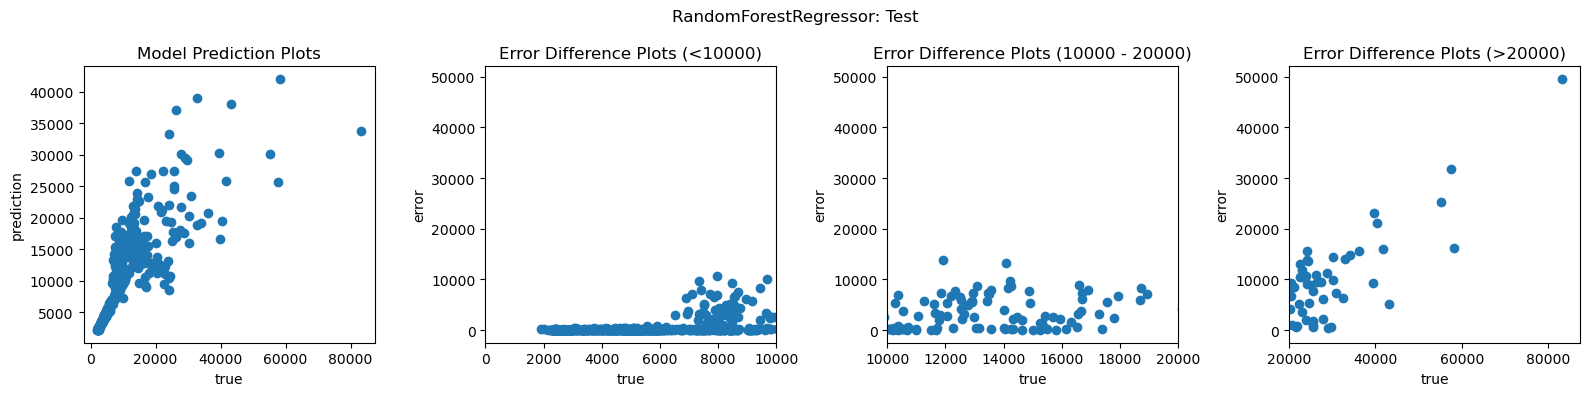

In [182]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.scatter(x=error_summaries['RandomForestRegressor']['test_clv'], y=error_summaries['RandomForestRegressor']['pred'])
plt.title('Model Prediction Plots')
plt.xlabel('true')
plt.ylabel('prediction')

plt.subplot(1, 4, 2)
plt.scatter(x=error_summaries['RandomForestRegressor']['test_clv'], y=error_summaries['RandomForestRegressor']['error'])
plt.title('Error Difference Plots (<10000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(0, 10000)

plt.subplot(1, 4, 3)
plt.scatter(x=error_summaries['RandomForestRegressor']['test_clv'], y=error_summaries['RandomForestRegressor']['error'])
plt.title('Error Difference Plots (10000 - 20000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(10000, 20000)

plt.subplot(1, 4, 4)
plt.scatter(x=error_summaries['RandomForestRegressor']['test_clv'], y=error_summaries['RandomForestRegressor']['error'])
plt.title('Error Difference Plots (>20000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(20000)

plt.suptitle('RandomForestRegressor: Test')
plt.tight_layout()

Pada rentang score < 10000, model menunjukkan kemampuan prediksi dengan baik jika dibandingkan ketikan memasuki ciri customer pada score > 10000. Outlier paling jauh adalah customer dengan ciri value > 80000

In [29]:
y_reset = rf_y_train_fold.reset_index(name='clv')

In [30]:
print(f"Jumlah data CLV dari range < 10000: {len(y_reset[(y_reset['clv'] < 10000)])}")
print(f"Jumlah data CLV dari range 10000 - 20000: {len(y_reset[(y_reset['clv'] <= 20000) & (y_reset['clv'] >= 10000)])}")
print(f"Jumlah data CLV dari range > 20000: {len(y_reset[(y_reset['clv'] > 20000)])}")

Jumlah data CLV dari range < 10000: 3426
Jumlah data CLV dari range 10000 - 20000: 632
Jumlah data CLV dari range > 20000: 272


In [171]:
test_df = pd.concat([rf_X_val_fold, rf_y_val_fold], axis=1).reset_index()
test_df = pd.concat([test_df, error_summaries['RandomForestRegressor'][['pred', 'error',  'error_percentage']]], axis=1)

**Summary**: Error outlier pada train & test tampak menunjukkan selisih yang semakin significant seiring dengan peningkatan clv. Dilihat dari informasi data, data dengan ciri customer > 10000 semakin sedikit, hal tersebut menjadi penyebab minimnya informasi bagi model dalam memprediksi customer >10000 dengan baik.<br> 
Guna mencegah bias bagi perusahaan dalam memprediksi score tiap customer, maka percobaan berikutnya akan dilakukan pengelompokkan data.<br>

#### Customer Segmentation

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler

In [11]:
scaler = RobustScaler()

In [109]:
encoded_df.columns

Index(['EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave',
       'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed',
       'Marital Status_Married', 'Marital Status_Single',
       'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3',
       'Renew Offer Type_Offer4', 'Vehicle Class', 'Coverage',
       'Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'Income', 'Customer Lifetime Value', 'Cluster'],
      dtype='object')

Customer akan dikelompokkan berdasarkan besaran spendingnya (MPA) dan besaran revenue yang dihasilkan (CLTV), kemudian weighted score dari kedua peringkat tersebut yang akan menjadi penentu tingkatan customer.

**Monthly Premium Auto Clustering**

In [115]:
encoded_df[['Monthly Premium Auto']].describe()

,Monthly Premium Auto
count,5051.000000
mean,92.911107
std,34.335010
min,61.000000
25%,68.000000
50%,82.000000
75%,109.000000
max,297.000000


In [12]:
mpa = encoded_df['Monthly Premium Auto']

In [13]:
scaled_mpa = scaler.fit_transform(mpa.to_frame())

In [35]:
inertia_score = []
for cluster in range(2,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(scaled_mpa)
    inertia_score.append(kmeans.inertia_)

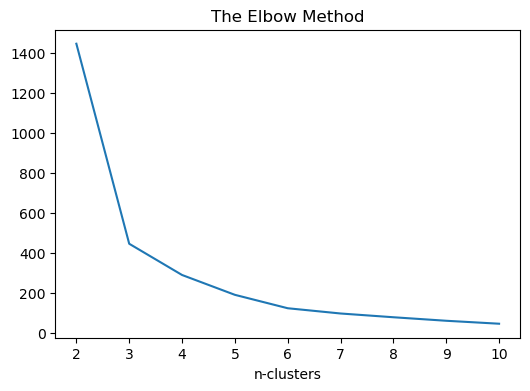

In [136]:
plt.figure(figsize=(6,4))
plt.plot(range(2,11), inertia_score)
plt.title('The Elbow Method')
plt.xlabel('n-clusters')
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 5, init="k-means++", random_state=10)
encoded_df['MPA_Cluster'] = kmeans.fit_predict(scaled_mpa)

In [15]:
encoded_df.groupby(['MPA_Cluster'])['Monthly Premium Auto'].describe()

,count,mean,std,min,25%,50%,75%,max
MPA_Cluster,,,,,,,,
0,1218.0,94.725780,7.688492,82.0,88.0,95.0,102.0,107.0
1,235.0,186.361702,14.615624,154.0,180.0,188.0,196.0,218.0
2,1030.0,120.277670,9.991473,108.0,112.0,117.0,128.0,153.0
3,2514.0,68.711615,5.144390,61.0,65.0,68.0,72.0,81.0
4,54.0,249.925926,24.204983,219.0,229.0,244.0,272.5,297.0


In [16]:
# Ordering the cluster
order = {0:1, 1:3, 2:2, 3:0, 4:4}
encoded_df['MPA_Cluster'] = encoded_df['MPA_Cluster'].map(order)

**LTV Clustering**

In [17]:
encoded_df['Customer Lifetime Value'].describe()

count     5051.000000
mean      8059.483178
std       6989.189674
min       1898.007675
25%       3964.441004
50%       5837.528088
75%       9028.564632
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [19]:
clv = encoded_df['Customer Lifetime Value']

In [20]:
scaler = RobustScaler()
scaled_clv = scaler.fit_transform(clv.to_frame())

In [21]:
inertia_score = []
# sil_score = [] # to measure how dense and well-separated the clusters are
for cluster in range(2,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(scaled_clv)
    # pred = kmeans.predict(clv)
    inertia_score.append(kmeans.inertia_)

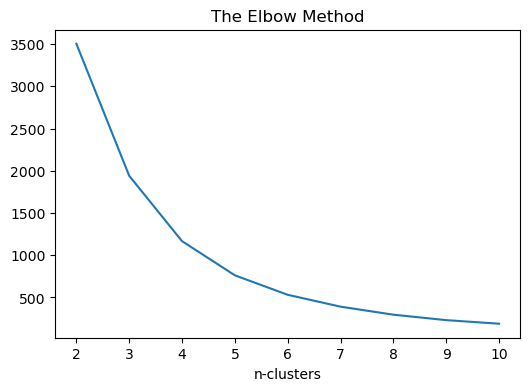

In [128]:
plt.figure(figsize=(6,4))
plt.plot(range(2,11), inertia_score)
plt.title('The Elbow Method')
plt.xlabel('n-clusters')
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 5, init="k-means++", random_state=10)
encoded_df['LTV_Cluster'] = kmeans.fit_predict(scaled_clv)

In [23]:
encoded_df.groupby(['LTV_Cluster'])['Customer Lifetime Value'].describe()

,count,mean,std,min,25%,50%,75%,max
LTV_Cluster,,,,,,,,
0,2654.0,4025.824902,1207.044828,1898.007675,2782.087531,4111.542649,5113.893003,6143.898219
1,66.0,44069.277945,10151.062874,34611.378960,36561.010767,41089.335310,46731.178725,83325.381190
2,531.0,14909.604565,2209.348143,11606.848680,13041.202135,14641.518180,16494.489085,19896.422260
3,1542.0,8279.786041,1306.038683,6158.601171,7319.928844,8108.314969,9086.991362,11578.126430
4,258.0,24925.999214,3822.982748,19957.790340,21795.146430,24040.429195,27507.102195,34090.035980


In [24]:
# Ordering the cluster
order = {0:0, 1:4, 2:2, 3:1, 4:3}
encoded_df['LTV_Cluster'] = encoded_df['LTV_Cluster'].map(order)

**Summary**

In [25]:
encoded_df['Weight_of_Cluster'] = encoded_df['MPA_Cluster'] + encoded_df['LTV_Cluster']

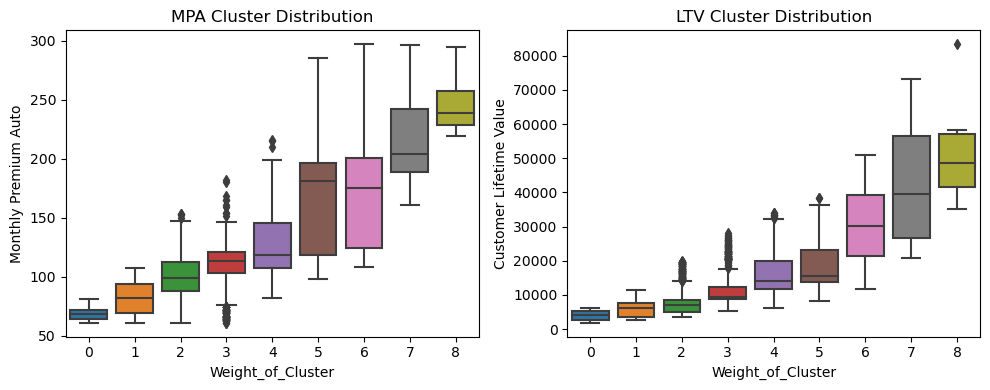

In [158]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(ax=ax[0], x=encoded_df['Weight_of_Cluster'], y=encoded_df['Monthly Premium Auto'])
ax[0].set_title('MPA Cluster Distribution')
sns.boxplot(ax=ax[1], x=encoded_df['Weight_of_Cluster'], y=encoded_df['Customer Lifetime Value'])
ax[1].set_title('LTV Cluster Distribution')
plt.tight_layout();

- Pembagian 3 sections: 1. Low : < 3; 2. Middle : 3 - 5; 3. High/Priority : > 5. <br> 
- Hasil kalkulasi weighted score menunjukkan bahwa semakin tinggi MPA, semakin tinggi golongan customer tersebut.<br>


In [26]:
def cluster_type(w):
    if w < 3:
        return 0
    elif w >= 3 and w <= 5:
        return 1
    else: 
        return 2

encoded_df['Cluster'] = encoded_df['Weight_of_Cluster'].apply(lambda w: cluster_type(w))

In [27]:
encoded_df.head()

,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital Status_Married,Marital Status_Single,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Vehicle Class,Coverage,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value,MPA_Cluster,LTV_Cluster,Weight_of_Cluster,Cluster
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,90.0,571.479602,11828.0,10083.486880,1,1,2,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,62.0,114.514440,44762.0,4943.386117,0,0,0,0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,62.0,257.248789,21514.0,11981.984810,0,2,2,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,116.0,556.800000,17913.0,4550.856045,2,0,2,0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,62.0,355.820799,19030.0,2372.155492,0,0,0,0


<Axes: >

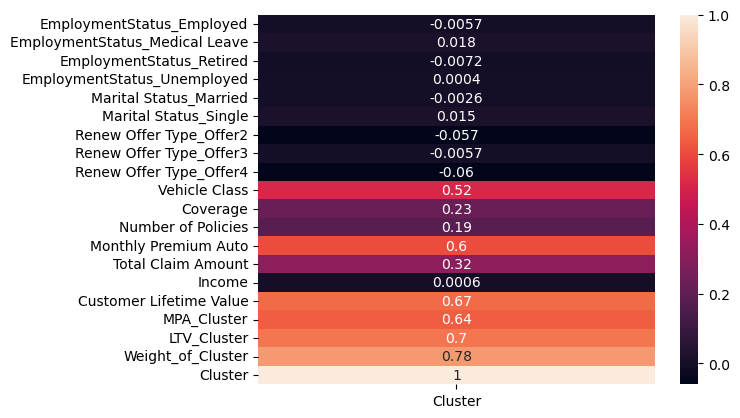

In [28]:
sns.heatmap(encoded_df.corr(method='spearman')[['Cluster']], annot=True)

### Prediction

In [29]:
import xgboost

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [30]:
rfc = RandomForestClassifier()
svm = SVC()
xgb = xgboost.XGBClassifier()

In [31]:
selected_features = encoded_df.drop(['Customer Lifetime Value', 'MPA_Cluster', 'LTV_Cluster', 'Weight_of_Cluster'], axis=1)

In [32]:
X = selected_features.drop(['Cluster'], axis=1)
y = selected_features['Cluster']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

Cross-Validation

In [37]:
kf = KFold(n_splits=7, shuffle=True, random_state=42)

In [38]:
rfc_crossval_score = cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv=kf)
svm_crossval_score = cross_val_score(svm, X_train, y_train, scoring='accuracy', cv=kf)
xgb_crossval_score = cross_val_score(xgb, X_train, y_train, scoring='accuracy', cv=kf)

In [39]:
print(f'Random Forest CrossVal: {rfc_crossval_score}')
print(f'XGB CrossVal: {xgb_crossval_score}')
print(f'SVM CrossVal: {svm_crossval_score}')

Random Forest CrossVal: [0.96153846 0.94307692 0.95069337 0.94298921 0.94298921 0.93836672
 0.93682589]
XGB CrossVal: [0.96461538 0.94153846 0.95531587 0.95069337 0.94453005 0.93836672
 0.94915254]
SVM CrossVal: [0.77384615 0.75076923 0.76887519 0.7642527  0.74268105 0.72419106
 0.73805855]


Pengujian model akan berfokus pada model XGB dan Random Forest.

In [40]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [42]:
rfc_ytrain_pred = rfc.predict(X_train)
xgb_ytrain_pred = xgb.predict(X_train)

In [43]:
metrics_summary = {
    'Report':{
        'RandomForestClassifier':classification_report(y_train, rfc_ytrain_pred, output_dict=True),
         'XGBoost':classification_report(y_train, xgb_ytrain_pred, output_dict=True),
    },
}

In [45]:
display(pd.DataFrame(metrics_summary['Report']))

,RandomForestClassifier,XGBoost
0,"{'precision': 0.9988304093567252, 'recall': 0.9997073456248171, 'f1-score': 0.9992686850958022, 'support': 3417.0}","{'precision': 0.9965004374453194, 'recall': 1.0, 'f1-score': 0.9982471516213848, 'support': 3417.0}"
1,"{'precision': 0.9990234375, 'recall': 0.9961051606621227, 'f1-score': 0.9975621647976598, 'support': 1027.0}","{'precision': 1.0, 'recall': 0.9883154819863681, 'f1-score': 0.9941234084231145, 'support': 1027.0}"
2,"{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 101.0}","{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 101.0}"
accuracy,0.9989,0.99736
macro avg,"{'precision': 0.9992846156189085, 'recall': 0.9986041687623133, 'f1-score': 0.9989436166311539, 'support': 4545.0}","{'precision': 0.9988334791484398, 'recall': 0.9961051606621227, 'f1-score': 0.9974568533481665, 'support': 4545.0}"
weighted avg,"{'precision': 0.9989000174003145, 'recall': 0.9988998899889989, 'f1-score': 0.9988993267809798, 'support': 4545.0}","{'precision': 0.9973689757427187, 'recall': 0.9973597359735974, 'f1-score': 0.997354292088187, 'support': 4545.0}"


Kedua model menghasilkan hasil prediksi yang sangat baik, namun Random Forest (99.89%) menghasilkan hasil yang sedikit lebih significant dibandingkan XGBoost (99.74%).
Namun dengan cara kerja random forest ada kemungkinan score tinggi tersebut karena model terlalu mempelajari data yang berpotensi overfitting ketika testing.<br>
Oleh karena itu pengujian model pada data testing dilakukan dilangkah berikutnya.

In [49]:
rfc_y_pred = rfc.predict(X_test)
xgb_y_pred = xgb.predict(X_test)

In [50]:
pred_metrics_summary = {
    'Report':{
        'RandomForestClassifier':classification_report(y_test, rfc_y_pred, output_dict=True),
         'XGBoost':classification_report(y_test, xgb_y_pred, output_dict=True),
    },
}

In [51]:
display(pd.DataFrame(pred_metrics_summary['Report']))

,RandomForestClassifier,XGBoost
0,"{'precision': 0.961439588688946, 'recall': 0.9842105263157894, 'f1-score': 0.9726918075422627, 'support': 380.0}","{'precision': 0.968421052631579, 'recall': 0.968421052631579, 'f1-score': 0.968421052631579, 'support': 380.0}"
1,"{'precision': 0.868421052631579, 'recall': 0.8608695652173913, 'f1-score': 0.8646288209606986, 'support': 115.0}","{'precision': 0.8403361344537815, 'recall': 0.8695652173913043, 'f1-score': 0.8547008547008547, 'support': 115.0}"
2,"{'precision': 0.6666666666666666, 'recall': 0.18181818181818182, 'f1-score': 0.28571428571428575, 'support': 11.0}","{'precision': 0.5714285714285714, 'recall': 0.36363636363636365, 'f1-score': 0.4444444444444444, 'support': 11.0}"
accuracy,0.938735,0.932806
macro avg,"{'precision': 0.8321757693290639, 'recall': 0.6756327577837875, 'f1-score': 0.7076783047390823, 'support': 506.0}","{'precision': 0.7933952528379772, 'recall': 0.7338742112197489, 'f1-score': 0.7558554505922928, 'support': 506.0}"
weighted avg,"{'precision': 0.9338909053117873, 'recall': 0.9387351778656127, 'f1-score': 0.9331977439118525, 'support': 506.0}","{'precision': 0.9306805726243067, 'recall': 0.932806324110672, 'f1-score': 0.9311847572717138, 'support': 506.0}"


**Conclusion**: Pengujian Random Forest menghasilkan total akurasi 93.87% > XGBoost 93.28%, menandakan kemampuan Random Forest dalam mengklasifikasi data lebih baik dibandingan XGBoost. Presisi (93.39%), Recall (93.87%) serta F1 score (93.32%) yang dihasilkan juga sangat baik, menandakan model hasil training pada Random Forest dapat digunakan untuk melakukan prediksi CLV yang berdasar klasifikasi.  

In [53]:
fi = rfc.feature_importances_

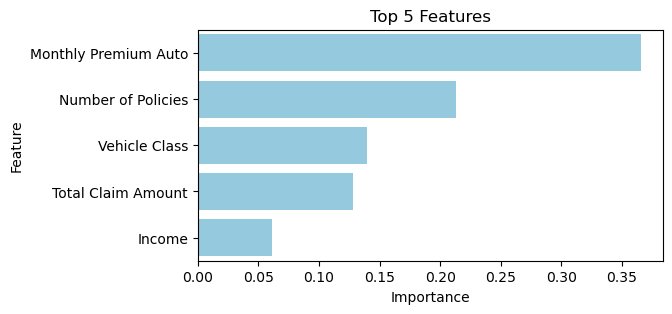

In [58]:
importance_df = pd.DataFrame({
    "Features": X_train.columns,
    "Importances": fi
}).sort_values(by='Importances', ascending=False)

plt.figure(figsize=(6, 3))
sns.barplot(x='Importances', y='Features', data=importance_df.nlargest(5, columns=['Importances']), color='skyblue')
plt.title('Top 5 Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Pada model random forest classifier menjelaskan terdapat 5 top features yang memberi pengaruh dalam proses penentuan LTV Customer, terutama fitur MPA. <br><br>
*Summary*: Besaran yang dibayar customer ke perusahaan (MPA), Jumlah Policy yang dipegang, Tipe/Jenis kendaraan yang dibeli, Pengeluaran perusahaan (claim) kepada customer, serta Pendapatan customer memegang peranan penting dalam penentuan value customer terhadap perusahaan.<br><br>